<a href="https://colab.research.google.com/github/Hassan-jr/Tensorflow-Deep-Learning/blob/main/CNN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-02-25 10:54:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.128, 173.194.217.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   175MB/s    in 0.6s    

2023-02-25 10:54:31 (175 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



# Become one with data

In [6]:
import os
for dirnames, dirpath, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirpath)} directories and {len(filenames)} images in {dirnames}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [44]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [34]:
import matplotlib.image as mpimage
import matplotlib.pyplot as plt

import random
def random_imgs (filepath, class_name):
  plt.figure(figsize=(10,7))
  for i in range(4):
    plt.subplot(2,2, i+1)
    target_file = filepath + '/' + class_name
    img = random.choice(os.listdir(target_file))
    img_path = target_file + '/' + img
    image_data = mpimage.imread(img_path)
  
    plt.imshow(image_data)
    plt.axis(False)
    plt.title(class_name + img)


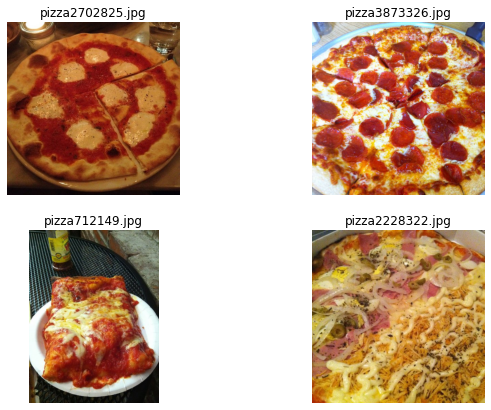

In [35]:
random_imgs(filepath="pizza_steak/train",
            class_name="pizza")

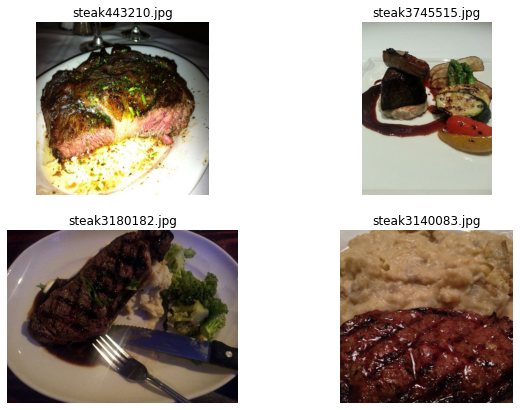

In [37]:
random_imgs(filepath="pizza_steak/train",
            class_name="steak")

## Data Preprocessing

In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data_gen = ImageDataGenerator(rescale=1/255.,
                                    height_shift_range = 0.2,
                                    width_shift_range=0.2,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    rotation_range=0.2,
                                    horizontal_flip=True)

In [48]:
train_data = data_gen.flow_from_directory(train_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42)

test_data = data_gen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          class_mode='binary',
                                          batch_size=32,
                                          shuffle=True,
                                          seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [53]:
len(train_data)

47

# Create the model

In [51]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile

In [52]:
model_0.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit The Modle

In [55]:
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 94s 2s/step - loss: 0.6514 - accuracy: 0.5900 - val_loss: 0.5459 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 91s 2s/step - loss: 0.5675 - accuracy: 0.7000 - val_loss: 0.5108 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 85s 2s/step - loss: 0.5527 - accuracy: 0.7367 - val_loss: 0.4831 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 86s 2s/step - loss: 0.5077 - accuracy: 0.7720 - val_loss: 0.4334 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 83s 2s/step - loss: 0.4878 - accuracy: 0.7740 - val_loss: 0.4502 - val_accuracy: 0.7860


In [56]:
def plot_history(history):
  loss = np.array(history.history['loss'])
  acc = np.array(history.history['accuracy'])

  val_loss = np.array(history.history['val_loss'])
  val_acc = np.array(history.history["val_accuracy"])

  epochs = np.array(range(len(loss))) + 1

  plt.figure(figsize=(12,7))
  plt.plot(epochs, loss, label="Loss")
  plt.plot(epochs, val_loss, label="Validation loss")
  plt.title("Loss vs Valid Loss")
  plt.legend()
  
  plt.figure(figsize=(12,7))
  plt.plot(epochs, acc, label="Acc")
  plt.plot(epochs, val_acc, label="Validation Acc")
  plt.title("Acc VS Val Acc")
  plt.legend()

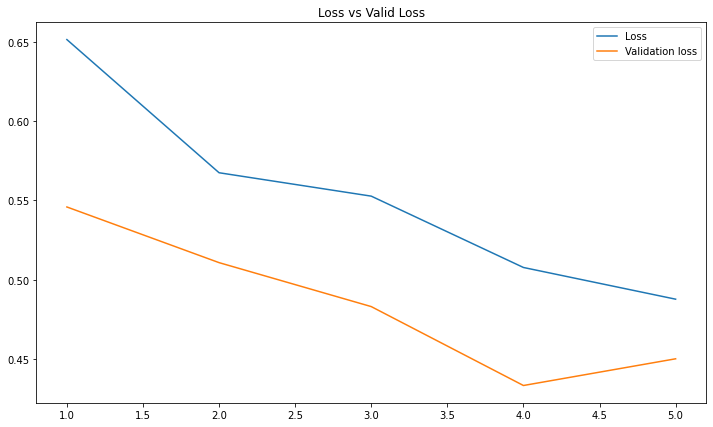

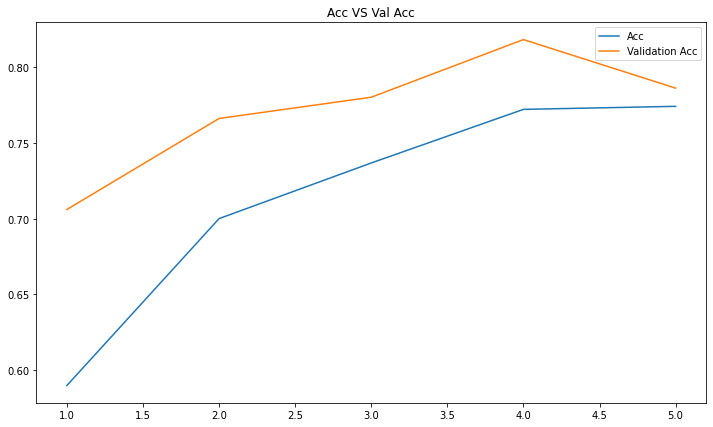

In [59]:
plot_history(history_0)